# Chapter 2.  데이터를 시각화하고 분석하기 위한 테크닉 10

#### 11. 데이터를 로딩하고 불필요한 항목을 제외

In [21]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.chdir('/Users/yun-yeongjun/Desktop/Technique100/make_data')
order_data = pd.read_csv('order_data.csv')
print(len(order_data))
order_data.head()

703886


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1,자양로점,SL,서울,서울,takeout,지불 완료
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2,가마산로2점,SL,서울,서울,delivery,배달 완료
2,71640388,195,C61227084,17,93678366,2021-04-01 11:00,2021-04-01 11:54,0,26470,9,화중로점,GB,경기,경기북부,delivery,주문 취소
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2,분포로점,BS,부산,부산,delivery,배달 완료
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2,하남산단점,GJ,광주,광주,delivery,배달 완료


In [4]:
# 이번 분석에서 필요하지 않은 데이터들 제외
order_data = order_data.loc[(order_data['status'] == 1) | (order_data['status'] == 2)]
print(len(order_data))
order_data.head()

574435


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1,자양로점,SL,서울,서울,takeout,지불 완료
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2,가마산로2점,SL,서울,서울,delivery,배달 완료
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2,분포로점,BS,부산,부산,delivery,배달 완료
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2,하남산단점,GJ,광주,광주,delivery,배달 완료
5,86102793,167,C06298599,21,70395221,2021-04-01 11:00,2021-04-01 11:59,1,37420,1,서하로점,GJ,광주,광주,takeout,지불 완료


* status
    - 0: 주문 접수
    - 1: 지불 완료
    - 2: 배달 완료
    - 9: 주문 취소
---
이번 분석의 핵심은 금액이라서 해당 없는 주문 접수, 주문 취소에 해당하는 status는 제외. 단, **주문 횟수**나 **주문 취소 횟수**를 확인하는 등 관점에 따라서는 그대로 두는 것이 나을 수 있다. 즉, **분석 관점에 따라 데이터 가공 방향을 신중하게 고려해야 한다.**

In [5]:
# 이어서 불필요한 데이터 제외
analyze_data = order_data[['store_id', 'customer_id', 'coupon_cd', 'order_accept_date', 'delivered_date', 
                           'total_amount', 'store_name', 'wide_area', 'narrow_area', 'takeout_name', 'status_name']]

print(analyze_data.shape)
analyze_data.head()

(574435, 11)


,store_id,customer_id,coupon_cd,order_accept_date,delivered_date,total_amount,store_name,wide_area,narrow_area,takeout_name,status_name
0,11,C65806632,57,2021-04-01 11:00,2021-04-01 11:39,28270,자양로점,서울,서울,takeout,지불 완료
1,59,C09760173,37,2021-04-01 11:00,2021-04-01 11:34,28270,가마산로2점,서울,서울,delivery,배달 완료
3,127,C64119972,17,2021-04-01 11:00,2021-04-01 11:17,23080,분포로점,부산,부산,delivery,배달 완료
4,174,C10231192,18,2021-04-01 11:00,2021-04-01 11:35,46920,하남산단점,광주,광주,delivery,배달 완료
5,167,C06298599,21,2021-04-01 11:00,2021-04-01 11:59,37420,서하로점,광주,광주,takeout,지불 완료


* 레코드 수나 항목 수가 매우 많은 데이터를 다룰 때는 대상 데이터를 가능한 작게 하는 편이 처리속도나 메모리 측면에서 좋다.
---
Tips
- 항목 수가 많을 경우 일일이 코드로 작성하는 것이 어려우므로, order_data.columns에서 화면에 출력된 항목을 복붙하는 것도 좋음
- 또는 모든 항목을 analyze_data에 추가한 다음 불필요한 항목을 뒤에서 지정해 삭제할 수도 있다.

#### 데이터 전체 이미지를 파악하자

In [6]:
# 분석용 데이터의 통계량 파악
analyze_data.describe()

,store_id,coupon_cd,total_amount
count,574435.000000,574435.000000,574435.000000
mean,99.113691,49.474741,29601.264965
std,55.910285,28.890069,9543.449437
min,1.000000,0.000000,6980.000000
25%,51.000000,24.000000,23080.000000
50%,99.000000,49.000000,28080.000000
75%,147.000000,75.000000,36170.000000
max,196.000000,99.000000,51000.000000


* describe()는 모든 수치형 데이터의 통계량을 출력한다. 여기서는 통계량이 의미가 없는 store_id, coupon_cd의 통계량까지 출력되는 것을 확인할 수 있다.


In [9]:
# 데이터 타입 확인
analyze_data.dtypes

store_id              int64
customer_id          object
coupon_cd             int64
order_accept_date    object
delivered_date       object
total_amount          int64
store_name           object
wide_area            object
narrow_area          object
takeout_name         object
status_name          object
dtype: object

In [12]:
# store_id와 coupon_cd를 문자형으로 변환
analyze_data[['store_id', 'coupon_cd']] = analyze_data[['store_id', 'coupon_cd']].astype(str)
analyze_data.dtypes

/var/folders/ch/vq9cmm0s6qx04xf726b_27g00000gn/T/ipykernel_2014/3945050395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analyze_data[['store_id', 'coupon_cd']] = analyze_data[['store_id', 'coupon_cd']].astype(str)


store_id             object
customer_id          object
coupon_cd            object
order_accept_date    object
delivered_date       object
total_amount          int64
store_name           object
wide_area            object
narrow_area          object
takeout_name         object
status_name          object
dtype: object

* 위 셀의 경고 문구: store_id, coupon_cd의 데이터 타입은 변경했지만 참조 데이터인 order_data의 타입을 변경해야한다는 내용
--- 
경고 메시지를 지우거나, 원본 데이터에서도 데이터 타입을 바꿔준다.

In [13]:
# 경고 지우기
# 이 방법은 임시 수단에 불과하므로 가능한 경고 메시지를 발생시키지 않는 것이 좋다.
import warnings
warnings.filterwarnings('ignore')

In [14]:
# 통계량 다시 조회
analyze_data.describe()

,total_amount
count,574435.000000
mean,29601.264965
std,9543.449437
min,6980.000000
25%,23080.000000
50%,28080.000000
75%,36170.000000
max,51000.000000


#### 13. 월별 매출을 집계하자

In [15]:
# 현재 날짜 항목 데이터는 두 가지이지만, 둘 다 데이터 타입이 object 타입이라서 집계할 수 없다.
# 날짜 타입으로 변환 필요
analyze_data['order_accept_date'] = pd.to_datetime(analyze_data['order_accept_date'])
analyze_data['order_accept_month'] = analyze_data['order_accept_date'].dt.strftime('%Y%m')
analyze_data[['order_accept_date', 'order_accept_month']].head()

,order_accept_date,order_accept_month
0,2021-04-01 11:00:00,202104
1,2021-04-01 11:00:00,202104
3,2021-04-01 11:00:00,202104
4,2021-04-01 11:00:00,202104
5,2021-04-01 11:00:00,202104


In [17]:
# 만약을 위해 delivered_date도 변환
analyze_data['delivered_date'] = pd.to_datetime(analyze_data['delivered_date'])
analyze_data['delivered_month'] = analyze_data['delivered_date'].dt.strftime('%Y%m')
analyze_data[['delivered_date', 'delivered_month']].head()

,delivered_date,delivered_month
0,2021-04-01 11:39:00,202104
1,2021-04-01 11:34:00,202104
3,2021-04-01 11:17:00,202104
4,2021-04-01 11:35:00,202104
5,2021-04-01 11:59:00,202104


In [18]:
analyze_data.dtypes

store_id                      object
customer_id                   object
coupon_cd                     object
order_accept_date     datetime64[ns]
delivered_date        datetime64[ns]
total_amount                   int64
store_name                    object
wide_area                     object
narrow_area                   object
takeout_name                  object
status_name                   object
order_accept_month            object
delivered_month               object
dtype: object

In [19]:
# 통계 데이터 월별 확인
month_data = analyze_data.groupby('order_accept_month')
month_data.describe()

total_amount                                              \
                          count          mean          std     min      25%   
order_accept_month                                                            
202104                 189388.0  29594.948571  9541.173902  6980.0  23080.0   
202105                 195699.0  29605.344432  9550.949075  6980.0  23080.0   
202106                 189348.0  29603.366394  9538.016581  6980.0  23080.0   

                                               
                        50%      75%      max  
order_accept_month                             
202104              28080.0  35860.0  51000.0  
202105              28080.0  36170.0  51000.0  
202106              28080.0  36170.0  51000.0

In [20]:
# 합계 금액 확인
month_data.sum()

,total_amount
order_accept_month,
202104,5604928120
202105,5793736300
202106,5605338220


#### 월별 추이를 시각화하자

* 표 형식은 값을 비교하는 목적으로는 적합하지 않다.
    - 표 안에서 숫자를 추출해 비교하는 작업을 사람이 직접해야 한다.
    - 전체 중 순위를 확인하기 위해 머릿속으로 계속 계산해야 한다.
* 따라서 별도로 계산하지 않고도 직관적으로 이해할 수 있는 그래프로 시각화하는 것은 매우 중요하다.
---
**인식해야 할 정보량을 줄이는 동시에 이해하기 쉽게 시각화하는 작업이 단순하게 느껴질지 모르지만, 시각화 하나만으로도 큰 연구 주제이다.**

<AxesSubplot:xlabel='order_accept_month'>

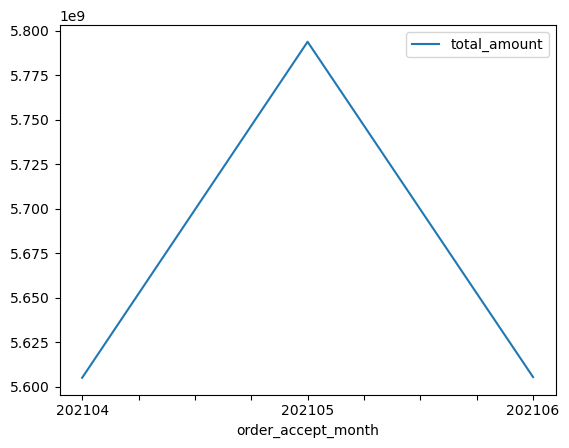

In [23]:
# matplotlib을 이용한 시각화

# 한글 폰트 처리
if os.name == 'ns': #windows
    plt.rc('font', family='Malgun Gothic')
elif os.name == 'posix': #mac
    plt.rc('font', family='AllieGothic')
    
plt.rc('axes', unicode_minus=False)  #minus font settings

# 월별 매출 합계 시각화
month_data.sum().plot()

* **5월 매출이 다른 날 매출보다 크다는 것을 표로 보는 것보다 직관적으로 알 수 있다.**
---
* matplotlib은 한국어 대응 X: 위 방법 참고

<AxesSubplot:xlabel='order_accept_month'>

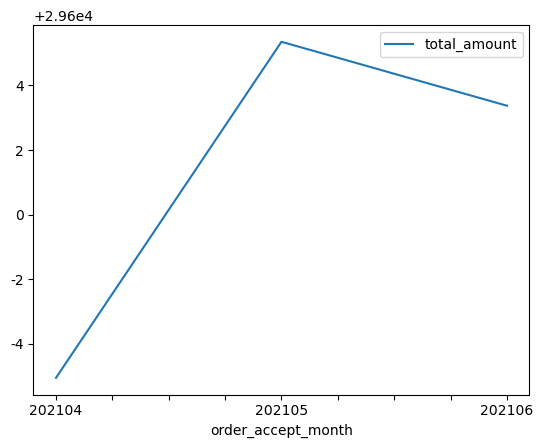

In [24]:
# 매출 평균액 시각화
month_data.mean().plot()

* 매출 평균액도 5월이 높지만 합계 금액 그래프와는 경향이 다른 것을 알 수 있다.
---
이런 경향을 보면 평소 매출이 어느 정도이고, 매출이 올랐을 때 얼마나 가설이 맞았는지 분석할 수 있다.

#### 15. 매출로부터 히스토그램을 만들자
- 이 데이터에서 히스토그램을 활용하면 매출 분포를 볼 수 있다.

(array([ 21523.,      0.,  48988., 135661., 111207.,  77584.,  54150.,
         59831.,  34400.,  31091.]),
 array([ 6980., 11382., 15784., 20186., 24588., 28990., 33392., 37794.,
        42196., 46598., 51000.]),
 <BarContainer object of 10 artists>)

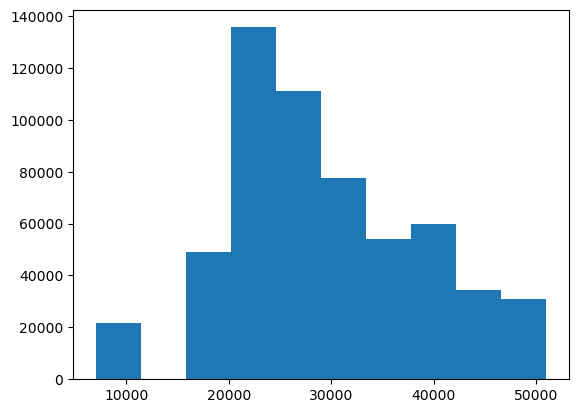

In [25]:
# 히스토그램이 어떤 것인지 출력해보자
plt.hist(analyze_data['total_amount'])

* 가로축은 가격대, 세로축은 레코드 수
---
- 주문 1건당 2만원~3만원의 주문이 많다: 지역이나 매장 단위로 보면 고객층의 특징을 파악하는 단서로 이용할 수 있다.
- 다음 대책을 수립할 때에도 중요한 요소가 된다.
- 파티 메뉴를 준비할 때 어느 정도의 가격까지 허용해야 수요와 매치가 되는지 검토할 수 있는 재료가 된다.

(array([10723., 10800.,     0.,     0.,     0., 48988., 45766., 78345.,
        23174., 66450., 44344., 38738., 27635., 42501., 12512., 35282.,
        23761., 11147., 23178., 22658.,  8433.]),
 array([ 6980.        ,  9076.19047619, 11172.38095238, 13268.57142857,
        15364.76190476, 17460.95238095, 19557.14285714, 21653.33333333,
        23749.52380952, 25845.71428571, 27941.9047619 , 30038.0952381 ,
        32134.28571429, 34230.47619048, 36326.66666667, 38422.85714286,
        40519.04761905, 42615.23809524, 44711.42857143, 46807.61904762,
        48903.80952381, 51000.        ]),
 <BarContainer object of 21 artists>)

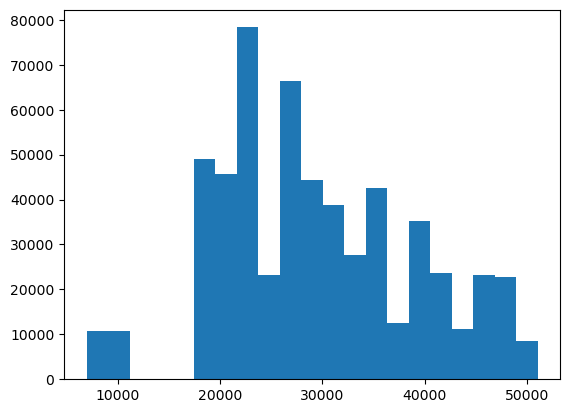

In [26]:
# 가로축의 단계를 더욱 세분화
plt.hist(analyze_data['total_amount'], bins=21)

* 세분화 해서 보면 더 자세한 분포를 확인할 수 있다.
* 단계를 구분하는 정도는 상황에따라 다르므로 먼저 기본 출력되는 데이터를 보는 것부터 시작한다.
* 너무 세세하게 보면 각 요철에 대해 설명하기 어려워진다.
* bins 값을 바꿔가면서 어떤 경향이 보이고 이를 어떻게 해석할 수 있는지, 그 해석이 타당한지 고려한다.
---
* 최적의 단계 수를 계산하는 공식도 있다고 함.
